In [1]:
import json

import pandas as pd
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 \
  import Features, EntitiesOptions, KeywordsOptions, EmotionOptions

natural_language_understanding = NaturalLanguageUnderstandingV1(
  username='06320980-d791-4920-834b-3c5368522608',
  password='UKVXqFnwnNnZ',
  version='2018-03-16')


### Function to Read

In [2]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'ascii'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [3]:
text = convert_pdf_to_txt('../Bollywood-Data-master/scripts-data/Highway.pdf')

In [4]:
print(type(text))
print(len(text))

<class 'str'>
129504


### Split text based on scenes

In [5]:
delimiter = 'Sc #'
text2 = text.split(delimiter)

In [6]:
print(type(text2))
print(len(text2))


<class 'list'>
73


##### Note: There are supposed to be 74 scene for JabWeMet, but ofc the delimiter has to be something better

#### Creating a table to dump the values into

In [7]:
main_table = pd.DataFrame()

In [8]:
for i,txt in enumerate(text2):
    try:
        response = natural_language_understanding.analyze(
          text = txt,
          features=Features(
            emotion=EmotionOptions())).get_result()
        mbst = response['emotion']['document']['emotion']
        mbst['scene'] = i

        table1 = pd.DataFrame.from_dict(mbst, orient='index').squeeze()

        main_table = main_table.append(table1)
    except:
        main_table = main_table.append({'anger':0, 'disgust':0,'fear':0, 'joy':0,'sadness':0, 'scene':i}, ignore_index=True)



In [9]:
main_table

,anger,disgust,fear,joy,sadness,scene
0,0.066618,0.057476,0.442381,0.634893,0.414910,0.0
0,0.145612,0.081604,0.137676,0.172231,0.191764,1.0
0,0.094086,0.065596,0.111935,0.702814,0.110925,2.0
0,0.300228,0.072830,0.254652,0.107095,0.067761,3.0
0,0.095563,0.039239,0.072659,0.574170,0.143649,4.0
0,0.130034,0.086034,0.609435,0.488297,0.180526,5.0
0,0.191047,0.161758,0.129919,0.179350,0.196402,6.0
0,0.115081,0.091458,0.151712,0.515791,0.508621,7.0
0,0.505430,0.116101,0.623707,0.654207,0.133762,8.0
0,0.098487,0.095724,0.084078,0.126572,0.125597,9.0


In [10]:
main_table['scene'] = main_table['scene'].astype(int)
main_table = main_table.set_index('scene')

In [11]:
main_table

,anger,disgust,fear,joy,sadness
scene,,,,,
0,0.066618,0.057476,0.442381,0.634893,0.414910
1,0.145612,0.081604,0.137676,0.172231,0.191764
2,0.094086,0.065596,0.111935,0.702814,0.110925
3,0.300228,0.072830,0.254652,0.107095,0.067761
4,0.095563,0.039239,0.072659,0.574170,0.143649
5,0.130034,0.086034,0.609435,0.488297,0.180526
6,0.191047,0.161758,0.129919,0.179350,0.196402
7,0.115081,0.091458,0.151712,0.515791,0.508621
8,0.505430,0.116101,0.623707,0.654207,0.133762


#### Plot the graph, for each emotion(maybe)

In [13]:
emo = 'fear'

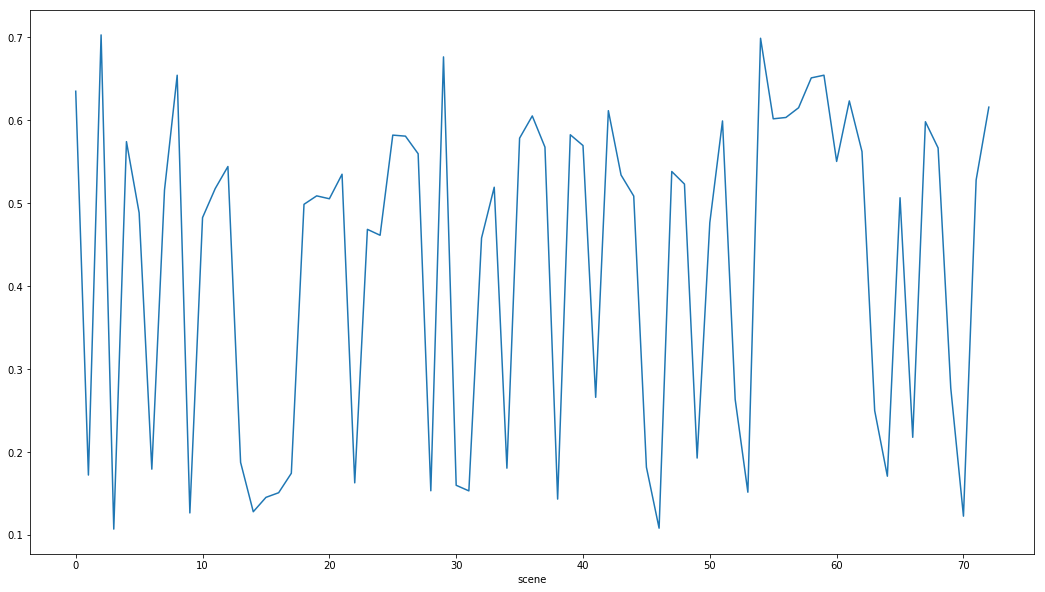

In [21]:
main_table.joy.plot(figsize = (18,10))

In [16]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('../GoogleNews-vectors-negative300.bin', binary=True)

In [26]:
response = natural_language_understanding.analyze(
          text = text,
          features=Features(
            keywords=KeywordsOptions(
          sentiment=True,
          emotion=True,
          limit=20))).get_result()


In [37]:
pd.DataFrame.from_dict(table1['emotion'].to_dict()).T

,anger,disgust,fear,joy,sadness
0,0.047513,0.041514,0.041570,0.615268,0.059086
1,0.059153,0.068834,0.058870,0.060382,0.464102
2,0.058019,0.040487,0.077105,0.123885,0.056412
3,0.015698,0.028257,0.114950,0.053388,0.305617
4,0.513903,0.012054,0.044590,0.035982,0.609083
5,0.109779,0.282500,0.202151,0.048390,0.476479
6,0.091797,0.078108,0.085190,0.191139,0.141719
7,0.146009,0.060036,0.127098,0.075226,0.630277
8,0.088473,0.074744,0.091248,0.179551,0.148831
9,0.044967,0.008785,0.979706,0.023896,0.008348


In [34]:
table1 = pd.DataFrame.from_dict(response['keywords'])
table1

,emotion,relevance,sentiment,text
0,"{'sadness': 0.059086, 'joy': 0.615268, 'fear':...",0.987015,"{'score': -0.104084, 'label': 'negative'}",Veera
1,"{'sadness': 0.464102, 'joy': 0.060382, 'fear':...",0.910129,"{'score': -0.00185221, 'label': 'negative'}",Mahabir
2,"{'sadness': 0.056412, 'joy': 0.123885, 'fear':...",0.766173,"{'score': 0.434448, 'label': 'positive'}",Veera ye raasta
3,"{'sadness': 0.305617, 'joy': 0.053388, 'fear':...",0.751187,"{'score': 0.0, 'label': 'neutral'}",Veera main keh
4,"{'sadness': 0.609083, 'joy': 0.035982, 'fear':...",0.740163,"{'score': -0.830776, 'label': 'negative'}",Veera screams
5,"{'sadness': 0.476479, 'joy': 0.04839, 'fear': ...",0.731625,"{'score': 0.0, 'label': 'neutral'}",Veera sit
6,"{'sadness': 0.141719, 'joy': 0.191139, 'fear':...",0.731101,"{'score': 0.0, 'label': 'neutral'}",Mahabir Bhaati
7,"{'sadness': 0.630277, 'joy': 0.075226, 'fear':...",0.729964,"{'score': -0.915761, 'label': 'negative'}",her. Veera
8,"{'sadness': 0.148831, 'joy': 0.179551, 'fear':...",0.728466,"{'score': 0.0, 'label': 'neutral'}",Veera kaha
9,"{'sadness': 0.008348, 'joy': 0.023896, 'fear':...",0.727329,"{'score': -0.67317, 'label': 'negative'}",Veera panics


In [40]:
x= table1.text.tolist()

In [41]:
x

['Veera',
 'Mahabir',
 'Veera ye raasta',
 'Veera main keh',
 'Veera screams',
 'Veera sit',
 'Mahabir Bhaati',
 'her. Veera',
 'Veera kaha',
 'Veera panics',
 'Veera Tripathy',
 'moved. Veera',
 'Veera’s eyes',
 'Veera stares',
 'Mahabir lowers',
 'Mahabir grabs',
 'Veera whimpers',
 'Mahabir flinches',
 'orders Veera',
 'Veera wonders']

In [43]:
vectors = [model[w] for w in x]

SyntaxError: invalid syntax (<ipython-input-43-e7a8f84a8c7f>, line 1)

In [46]:
vec = []
for w in x:
    try:
        vec.append(model[w])
    except:
        vec.append(NaN)
        
vec

NameError: name 'NaN' is not defined

In [23]:
table1 = pd.DataFrame.from_dict(response['keywords'])
table1

,emotion,relevance,sentiment,text
0,"{'sadness': 0.059086, 'joy': 0.615268, 'fear':...",0.987015,"{'score': -0.104084, 'label': 'negative'}",Veera
1,"{'sadness': 0.464102, 'joy': 0.060382, 'fear':...",0.910129,"{'score': -0.00185221, 'label': 'negative'}",Mahabir
2,"{'sadness': 0.056412, 'joy': 0.123885, 'fear':...",0.766173,"{'score': 0.434448, 'label': 'positive'}",Veera ye raasta
3,"{'sadness': 0.305617, 'joy': 0.053388, 'fear':...",0.751187,"{'score': 0.0, 'label': 'neutral'}",Veera main keh
4,"{'sadness': 0.609083, 'joy': 0.035982, 'fear':...",0.740163,"{'score': -0.830776, 'label': 'negative'}",Veera screams
5,"{'sadness': 0.476479, 'joy': 0.04839, 'fear': ...",0.731625,"{'score': 0.0, 'label': 'neutral'}",Veera sit
6,"{'sadness': 0.141719, 'joy': 0.191139, 'fear':...",0.731101,"{'score': 0.0, 'label': 'neutral'}",Mahabir Bhaati
7,"{'sadness': 0.630277, 'joy': 0.075226, 'fear':...",0.729964,"{'score': -0.915761, 'label': 'negative'}",her. Veera
8,"{'sadness': 0.148831, 'joy': 0.179551, 'fear':...",0.728466,"{'score': 0.0, 'label': 'neutral'}",Veera kaha
9,"{'sadness': 0.008348, 'joy': 0.023896, 'fear':...",0.727329,"{'score': -0.67317, 'label': 'negative'}",Veera panics


In [320]:
data = pd.read_csv("../Bollywood-Data-master/wikipedia-data/avg_wv_relation.csv") 
# Preview the first 5 lines of the loaded data 
data.head(30)

,Char,Gender,Desc,WordVec
0,woman_Aan Milo Sajna,FEMALE,young,-0.105138 -0.029248 -0.063298 -0.007706 -0.180...
1,Anil_Aan Milo Sajna,MALE,NaN,0
2,Savitri_Aan Milo Sajna,FEMALE,NaN,0
3,Deepali_Aan Milo Sajna,FEMALE,NaN,0
4,Shekar_Abhinetri,UNKNOWN,NaN,0
5,Anjana_Abhinetri,FEMALE,NaN,0
6,Nekichand_Bachpan,unknown,NaN,0
7,father_Bachpan,MALE,unhappilly,0
8,Rahim_Bachpan,MALE,"father, father, father",-2.82591750e-01 6.52440000e-02 -2.36074500...
9,Kashi_Bachpan,UNKNOWN,innocent,-1.03062000e-01 1.66135000e-01 -2.67929000...


In [321]:
from typing import List

Vector = List[float]
def vector_len(v: Vector) -> float:
    return math.sqrt(sum([x*x for x in v]))

def dot_product(v1: Vector, v2: Vector) -> float:
    assert len(v1) == len(v2)
    return sum([x*y for (x,y) in zip(v1, v2)])

def cosine_similarity(v1: Vector, v2: Vector) -> float:
    """
    Returns the cosine of the angle between the two vectors.
    Results range from -1 (very different) to 1 (very similar).
    """
    return dot_product(v1, v2) / (vector_len(v1) * vector_len(v2))

In [212]:
paddingwordvec = [0 for i in range(200)]

len(paddingwordvec)

200

0.7677237007873486

2161


In [322]:
data1 = data.dropna()


somex = data1.Char.tolist()
for i,j in enumerate(somex):
    z = j.split('_')
    if len(z) == 1:
        val = i
        print(val)
data1 = data1.drop(data1.index[[val]])

data1['Movie'] = data1['Char'].apply(lambda s:s.split('_')[1])
data1['Character'] = data1['Char'].apply(lambda s:s.split('_')[0])
        
data1

2161


,Char,Gender,Desc,WordVec,Movie,Character
0,woman_Aan Milo Sajna,FEMALE,young,-0.105138 -0.029248 -0.063298 -0.007706 -0.180...,Aan Milo Sajna,woman
7,father_Bachpan,MALE,unhappilly,0,Bachpan,father
8,Rahim_Bachpan,MALE,"father, father, father",-2.82591750e-01 6.52440000e-02 -2.36074500...,Bachpan,Rahim
9,Kashi_Bachpan,UNKNOWN,innocent,-1.03062000e-01 1.66135000e-01 -2.67929000...,Bachpan,Kashi
12,actor_Bombay Talkie,MALE,famous,0.022116 -0.270536 0.235497 0.218431 -0.129...,Bombay Talkie,actor
13,Seema_Chetna,FEMALE,unrecognizable,0,Chetna,Seema
14,man_Chetna,MALE,"shy, young",-0.03117 -0.064567 0.0203845 0.037786 -0...,Chetna,man
15,Anil_Chetna,MALE,"father, father, father",-2.82591750e-01 6.52440000e-02 -2.36074500...,Chetna,Anil
18,Vasantpur_Dharti,unknown,entire,-2.83600000e-02 1.34502000e-01 -2.01036000...,Dharti,Vasantpur
20,son_Dharti,MALE,general,-0.07573 -0.23854 0.13686 0.148458 -0.270...,Dharti,son


In [323]:
def replace1(row):
    val = row['WordVec']
    if val == '0':
        val = paddingwordvec
    else:
        z = val.split(' ')
        final_vec1 = []
        for i in z:
            if i != '':
                final_vec1.append(float(i))
                val = final_vec1

    return val

data1['WordVec'] = data1.apply(replace1, axis = 1)
data1

,Char,Gender,Desc,WordVec,Movie,Character
0,woman_Aan Milo Sajna,FEMALE,young,"[-0.105138, -0.029248, -0.063298, -0.007706, -...",Aan Milo Sajna,woman
7,father_Bachpan,MALE,unhappilly,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Bachpan,father
8,Rahim_Bachpan,MALE,"father, father, father","[-0.28259175, 0.065244, -0.2360745, -0.1025212...",Bachpan,Rahim
9,Kashi_Bachpan,UNKNOWN,innocent,"[-0.103062, 0.166135, -0.267929, -0.176946, -0...",Bachpan,Kashi
12,actor_Bombay Talkie,MALE,famous,"[0.022116, -0.270536, 0.235497, 0.218431, -0.1...",Bombay Talkie,actor
13,Seema_Chetna,FEMALE,unrecognizable,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Chetna,Seema
14,man_Chetna,MALE,"shy, young","[-0.03117, -0.064567, 0.0203845, 0.037786, -0....",Chetna,man
15,Anil_Chetna,MALE,"father, father, father","[-0.28259175, 0.065244, -0.2360745, -0.1025212...",Chetna,Anil
18,Vasantpur_Dharti,unknown,entire,"[-0.02836, 0.134502, -0.201036, -0.149337, 0.1...",Dharti,Vasantpur
20,son_Dharti,MALE,general,"[-0.07573, -0.23854, 0.13686, 0.148458, -0.270...",Dharti,son


In [224]:
import numpy as np
data1 = data1['WordVec'].replace(0, np.nan)

In [222]:
data1 = data1.reset_index()
data1

,index,WordVec
0,0,-0.105138 -0.029248 -0.063298 -0.007706 -0.180...
1,7,0
2,8,-2.82591750e-01 6.52440000e-02 -2.36074500...
3,9,-1.03062000e-01 1.66135000e-01 -2.67929000...
4,12,0.022116 -0.270536 0.235497 0.218431 -0.129...
5,13,0
6,14,-0.03117 -0.064567 0.0203845 0.037786 -0...
7,15,-2.82591750e-01 6.52440000e-02 -2.36074500...
8,18,-2.83600000e-02 1.34502000e-01 -2.01036000...
9,20,-0.07573 -0.23854 0.13686 0.148458 -0.270...


In [205]:

wv = data1.WordVec.tolist()

z = wv[0].split(' ')
final_vec1 = []
for i in z:
    if i != '':
        final_vec1.append(float(i))
        


z = wv[17].split(' ')
final_vec2 = []
for i in z:
    if i != '':
        final_vec2.append(float(i))

In [206]:
y

0.9999999999999998

In [327]:
movie1 = 'Khilona'
movie2 = 'Geet'


In [328]:
datamovie1 = data1[data1.Movie == movie1]
display(datamovie1)
datamovie2 = data1[data1.Movie == movie2]
display(datamovie2)

,Char,Gender,Desc,WordVec,Movie,Character
64,Radha_Khilona,FEMALE,young,"[-0.105138, -0.029248, -0.063298, -0.007706, -...",Khilona,Radha
67,Bihari_Khilona,MALE,lover,"[-0.050229, 0.03896, -0.080275, -0.0469085, -0...",Khilona,Bihari
68,Chand_Khilona,FEMALE,"mother, sister, noble","[-0.232973333, -0.035391, -0.141018333, -0.028...",Khilona,Chand
69,Singh_Khilona,MALE,rich,"[-0.152485, 0.032242, -0.167403, -0.081328, -0...",Khilona,Singh
72,Vijaykamal_Khilona,MALE,son,"[-0.1204035, 0.0666285, -0.151991, -0.082985, ...",Khilona,Vijaykamal


,Char,Gender,Desc,WordVec,Movie,Character
26,Sarju_Geet,MALE,"father, father, father, father, interested","[-0.3149276, 0.083348, -0.2835022, -0.1304588,...",Geet,Sarju
28,Janki_Geet,FEMALE,"sister, sister, sister","[-0.280121, -0.002382, -0.197149, -0.063887, -...",Geet,Janki
29,Dindayal_Geet,UNKNOWN,widowed,"[-0.140482, -0.203134, 0.07209, 0.117395, -0.3...",Geet,Dindayal
30,Kunver_Geet,MALE,"father, father","[-0.251192667, 0.0579946667, -0.209844, -0.091...",Geet,Kunver


In [329]:
import numpy as np

for i in range(len(datamovie1)):
    val = np.array(datamovie1.iloc[i].WordVec)
    lst = np.array(datamovie2.WordVec.tolist())
    retv = [cosine_similarity(val, i) for i in lst]
    print(retv)

[0.8153235149262107, 0.81653096041881, 0.9066770623494391, 0.7677237008610034]
[0.8698536945240811, 0.8558918892762154, 0.818535381586737, 0.8257229406383032]
[0.9842012459881693, 0.989407354375943, 0.8738875753493005, 0.9717424386405044]
[0.9239637708365384, 0.9179833626805395, 0.8636530791862284, 0.8893057983155104]
[0.9860245174265359, 0.9744728971405546, 0.7759451164598435, 0.9698253388868343]
